# **PLOT QUALITY AND MUTATION TARGET ANALYSIS**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import json
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
import matplotlib.colors as mcolors

%matplotlib inline


# Data loading
Since the data are divided into subfolders according to quality, as the first operation, unique files containing all target data contained in each subfolder are created.  
To create these files, we will iterate through each subfolder and concatenate the data.

In [2]:
def load_and_concat(folder_path):

    dataframes = []

    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):  
            file_path = os.path.join(folder_path, filename)
            df = pd.read_csv(file_path)
            dataframes.append(df)

    combined_df = pd.concat(dataframes, ignore_index=True)
    return combined_df

In [3]:
#wild type files
wild_type_1 = '/home/federica/LAB2/data_202409181630_allDB/wild_type/wild_type_1'
wild_type_2 = '/home/federica/LAB2/data_202409181630_allDB/wild_type/wild_type_2'
wild_type_3 = '/home/federica/LAB2/data_202409181630_allDB/wild_type/wild_type_3'

#mutantion target files
mutation_target_1 = '/home/federica/LAB2/data_202409181630_allDB/mutation_target/mutation_target_1'
mutation_target_2 = '/home/federica/LAB2/data_202409181630_allDB/mutation_target/mutation_target_2'
mutation_target_3 = '/home/federica/LAB2/data_202409181630_allDB/mutation_target/mutation_target_3'

#mixed files
mixed_1 = '/home/federica/LAB2/data_202409181630_allDB/mixed/mixed_1'
mixed_2 = '/home/federica/LAB2/data_202409181630_allDB/mixed/mixed_2'
mixed_3 = '/home/federica/LAB2/data_202409181630_allDB/mixed/mixed_3'

In [4]:
wild_type_1 = load_and_concat(wild_type_1)
wild_type_2 = load_and_concat(wild_type_2)
wild_type_3 = load_and_concat(wild_type_3)

mutation_target_1 = load_and_concat(mutation_target_1)
mutation_target_2 = load_and_concat(mutation_target_2)
mutation_target_3 = load_and_concat(mutation_target_3)

mixed_1 = load_and_concat(mixed_1)
mixed_2 = load_and_concat(mixed_2)
mixed_3 = load_and_concat(mixed_3)

# Count the number of targets for each quality in each category
Through cleaning and mutation study, the dataset was divided into three main groups:

**wild_type** = the molecules having in the assay description the keywords wild type

**mutation_target** = the molecules having in the assay description a mutation explicitly

**mixed** = all data that meet the filtering rules but do not explicitly contain mutations or the wild type keywords


In [5]:
def get_max_min_targets(data):
    # Ottieni il conteggio dei target
    target_counts = data['Target ChEMBL ID'].value_counts()
    
    max_count = target_counts.max()
    min_count = target_counts.min()
    
    max_targets = target_counts[target_counts == max_count].index.tolist()
    min_targets = target_counts[target_counts == min_count].index.tolist()
    
    return max_targets, min_targets

In [6]:
def count_targets_by_quality(data, quality_label):
    num_targets = data['Target ChEMBL ID'].nunique()
    avg_points_per_target = data.groupby('Target ChEMBL ID').size().mean()
    min_points_per_target = data.groupby('Target ChEMBL ID').size().min()
    max_points_per_target = data.groupby('Target ChEMBL ID').size().max()
    total_points = data.shape[0]
    max_target, min_target = get_max_min_targets(data)
    
    dict_data = {
        "num_targets": num_targets,
        "avg_points_per_target": avg_points_per_target,
        "min_points_per_target": min_points_per_target,
        "max_points_per_target": max_points_per_target,
        "total_points": total_points,
        "max_target": max_target,  
        "min_target": min_target,
        "quality_label": quality_label  
    }
    
    return dict_data

In [7]:
wild_type_1_data = count_targets_by_quality(wild_type_1, 'wild_type_1')
wild_type_2_data = count_targets_by_quality(wild_type_2, 'wild_type_2')
wild_type_3_data = count_targets_by_quality(wild_type_3, 'wild_type_3')

mutation_target_1_data = count_targets_by_quality(mutation_target_1, 'mutation_target_1')
mutation_target_2_data = count_targets_by_quality(mutation_target_2, 'mutation_target_2')
mutation_target_3_data = count_targets_by_quality(mutation_target_3, 'mutation_target_3')

mixed_1_data = count_targets_by_quality(mixed_1, 'mixed_1')
mixed_2_data = count_targets_by_quality(mixed_2, 'mixed_2')
mixed_3_data = count_targets_by_quality(mixed_3, 'mixed_3')

In [8]:
def plot_dict_data_with_tables(dict_data):
    # Verifica che i campi 'max_target' e 'min_target' siano presenti nel dizionario
    if 'max_target' not in dict_data or 'min_target' not in dict_data:
        raise ValueError("Il dizionario deve contenere i campi 'max_target' e 'min_target'")
    
    # Converti le liste in stringhe separate da virgole
    max_target_str = ', '.join(dict_data['max_target'])
    min_target_str = ', '.join(dict_data['min_target'])
    
    table_data = [
        ['Number of targets', dict_data['num_targets']],
        ['Total points', dict_data['total_points']],
        ['Min points per target', dict_data['min_points_per_target']],
        ['Max points per target', dict_data['max_points_per_target']],
        ['Avg point per target', dict_data['avg_points_per_target']],
        ['Target max points', max_target_str],
        ['Target min points', min_target_str]
    ]
    
    # Crea la tabella con plotly
    fig = go.Figure(data=[
        go.Table(
            header=dict(values=['Descrption', 'Value'],
                        fill_color='paleturquoise',
                        align='left'),
            cells=dict(values=[list(zip(*table_data))[0], list(zip(*table_data))[1]],
                       fill_color='lavender',
                       align='left'))
    ])
    
    fig.update_layout(height=400, showlegend=False, title_text="Statistics for quality label: " + dict_data['quality_label'])
    fig.show()

In [9]:
plot_dict_data_with_tables(wild_type_1_data)
#plot_dict_data_with_tables(wild_type_2_data)
#plot_dict_data_with_tables(wild_type_3_data)

plot_dict_data_with_tables(mutation_target_1_data)
plot_dict_data_with_tables(mutation_target_2_data)
plot_dict_data_with_tables(mutation_target_3_data)

plot_dict_data_with_tables(mixed_1_data)
#plot_dict_data_with_tables(mixed_2_data)
plot_dict_data_with_tables(mixed_3_data)

# Point distribution by Target

Group data by target and count the number of points for each target.

Sort the targets by count and select the top N.

In [10]:
def plot_top_targets(data, top_n=50):
    target_group = data.groupby('Target ChEMBL ID').size().reset_index(name='count')
    top_targets = target_group.nlargest(top_n, 'count')

    fig = px.bar(top_targets, x='Target ChEMBL ID', y='count', 
                 title=f'Top {top_n} Targets', 
                 labels={'Target ChEMBL ID': 'Target ChEMBL ID', 'count': 'Count'},
                 hover_data={'Target ChEMBL ID': True, 'count': True})
    
    fig.update_layout(xaxis=dict(tickvals=[], title=''))

    fig.show()

In [11]:
plot_top_targets(wild_type_1)
plot_top_targets(mutation_target_1)
plot_top_targets(mixed_1)

**Group by Target ChEMBL ID and count the points**

In [12]:

def plot_grouped_targets(data):
    
    target_group = data['Target ChEMBL ID'].value_counts()
    bins = [0, 10, 50, 100, 500, 1000, float('inf')] 
    labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '>1000']
    target_bins = pd.cut(target_group, bins=bins, labels=labels)

    target_counts = target_bins.value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='coolwarm', dodge=False, legend=False)
    
    plt.xlabel('Target occurences')
    plt.ylabel('Target count')
    plt.title('Target count distribution')
    plt.show()



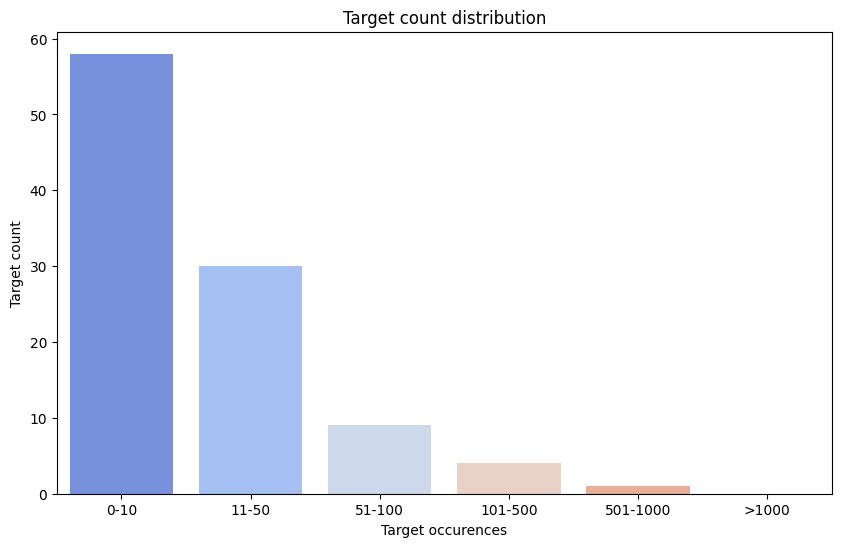

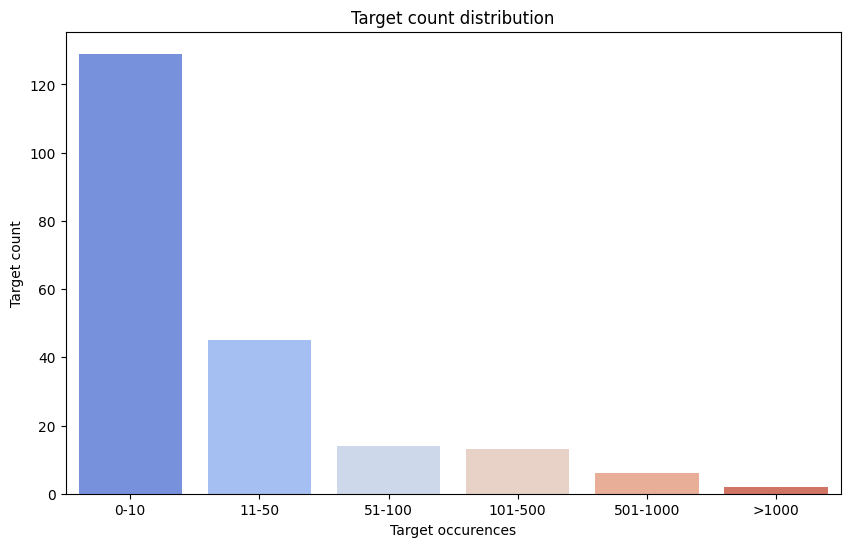

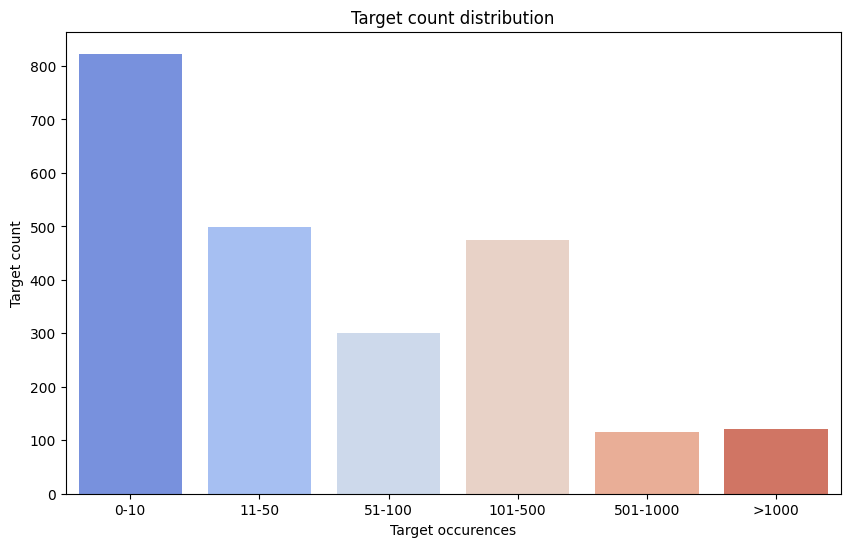

In [13]:
plot_grouped_targets(wild_type_1)
plot_grouped_targets(mutation_target_1)
plot_grouped_targets(mixed_1)

# Focus on target of interest: HDAC6, HSP90, EGFR
**HDAC6** Target ChEMBL ID: CHEMBL1865

**HSP90** Target ChEMBL ID: CHEMBL3536

**EGFR**  Target ChEMBL ID: CHEMBL203

In [14]:
def plot_target_of_interest(data, target_list, quality_label):
    # Raggruppa i dati per ottenere il conteggio dei target
    target_group = data.groupby('Target ChEMBL ID').size().reset_index(name='count')
    
    # Crea il grafico a barre con plotly
    fig = px.bar(target_group, x='Target ChEMBL ID', y='count', 
                 title=f'Targets of Interest for {quality_label}', 
                 labels={'Target ChEMBL ID': 'Target', 'count': 'Count'},
                 hover_data={'Target ChEMBL ID': True, 'count': True},
                 color='Target ChEMBL ID', color_continuous_scale='coolwarm')
    
    # Aggiungi annotazioni per i target di interesse
    for target in target_list:
        target_value = target_group[target_group['Target ChEMBL ID'] == target]
        if not target_value.empty:
            fig.add_annotation(x=target_value['Target ChEMBL ID'].values[0],
                               y=target_value['count'].values[0],
                               text=f'{target}',
                               showarrow=True,
                               arrowhead=2,
                               ax=0,
                               ay=-40)
        else:
            print(f"Warning: Target {target} not found in the data.")
    
    # Nascondi le etichette dell'asse X
    fig.update_layout(xaxis=dict(tickvals=[], title=''))
    
    # Mostra il grafico
    fig.show()

In [15]:
plot_target_of_interest(wild_type_1, ['CHEMBL1795123', 'CHEMBL203', 'CHEMBL1865'], "wild_type_1")
plot_target_of_interest(wild_type_2, ['CHEMBL1795123', 'CHEMBL203', 'CHEMBL1865'], "wild_type_2")
plot_target_of_interest(wild_type_3, ['CHEMBL1795123', 'CHEMBL203', 'CHEMBL1865'], "wild_type_3")

# Focus on Mutation

In [16]:
def mutation(data_1, data_2, data_3):

    combined_data = pd.concat([data_1, data_2, data_3])
    
    # Conta le mutazioni per 'Target ChEMBL ID' e dataset
    target_counts = combined_data.groupby(['Dataset', 'Target ChEMBL ID']).size().reset_index(name='Count')
    
    # Crea il sunburst chart
    fig = px.sunburst(target_counts, path=['Dataset', 'Target ChEMBL ID'], values='Count',
                      title='Distribuzione delle Mutazioni per Target nei Tre Dataset')
    fig.show()

In [17]:
mutation(mutation_target_1,mutation_target_2,mutation_target_3)

KeyError: 'Dataset'

# Scatter plot on mixed
Since the number of targets belonging to the mixed class is very high, 
it was decided to use a scatter plotter to represent the distribution of molecules.

In [20]:
def plot_target_scatter(data, target_list,quality_label):
    
    target_group = data.groupby('Target ChEMBL ID').size().reset_index(name='count')
    
    # Calcola il numero totale di target
    total_targets = target_group['Target ChEMBL ID'].nunique()
    
    # Crea lo scatter plot con plotly
    fig = px.scatter(target_group, x='Target ChEMBL ID', y='count', 
                     title=f'Targets of Interest for {quality_label} (Total Targets: {total_targets})', 
                     labels={'Target ChEMBL ID': 'Target', 'count': 'Count'},
                     hover_data={'Target ChEMBL ID': True, 'count': True},
                     color='Target ChEMBL ID', color_continuous_scale='coolwarm')
    
    # Aggiungi annotazioni per i target di interesse
    for target in target_list:
        target_value = target_group[target_group['Target ChEMBL ID'] == target]
        if not target_value.empty:
            fig.add_annotation(x=target_value['Target ChEMBL ID'].values[0],
                               y=target_value['count'].values[0],
                               text=f'{target}',
                               showarrow=True,
                               arrowhead=2,
                               ax=0,
                               ay=-40)
        else:
            print(f"Warning: Target {target} not found in the data.")
    
    # Nascondi le etichette dell'asse X
    fig.update_layout(xaxis=dict(tickvals=[], title=''))
    
    # Mostra il grafico
    fig.show()


# Example usage
targets_of_interest = ['CHEMBL1795123', 'CHEMBL203', 'CHEMBL1865']


In [21]:
plot_target_scatter(mixed_1, targets_of_interest, 'mixed_1')
plot_target_scatter(mixed_2, targets_of_interest, 'mixed_2')
plot_target_scatter(mixed_3, targets_of_interest, 'mixed_3')